In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from collections import deque
from scipy.stats import norm
from scipy.stats import binom, poisson, expon, geom
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway as anova_1way

from scipy.stats import kruskal # numeric Vs catogerical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
from scipy.stats import skew, shapiro #[Test for normality]

#  Business Case - LoanTap - Logistic Regression

INDEX
- (A) Problem Statements
- (B) shape, null values and duplicates
- (C) Effect of imputing null values in mort_acc column
- (D) Column Profiling / Feature engineering
- (E) Features Analysis(univariate/bivariate)
- (F) Checking outliers
- (G) Checking Multicolliniarity
- (H) Column transformation and model building
- (I) Checking all metrics
- (J) observations
- (K) Recommendations

# (A) Problem Statements

- Given a set of attributes for an Individual, determine if a credit line should be extended to them.
- If so, what should the repayment terms be in business recommendations?

# (B) shape, null values and duplicates  

In [2]:
Data = pd.read_csv("D:\Python programmes\Data Collection\logistic_regression.csv")

In [3]:
df = Data.copy(deep=True)

In [4]:
df.shape

(396030, 27)

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
for col in df.columns:
    print(col,": ",df[col].nunique())

loan_amnt :  1397
term :  2
int_rate :  566
installment :  55706
grade :  7
sub_grade :  35
emp_title :  173105
emp_length :  11
home_ownership :  6
annual_inc :  27197
verification_status :  3
issue_d :  115
loan_status :  2
purpose :  14
title :  48817
dti :  4262
earliest_cr_line :  684
open_acc :  61
pub_rec :  20
revol_bal :  55622
revol_util :  1226
total_acc :  118
initial_list_status :  2
application_type :  3
mort_acc :  33
pub_rec_bankruptcies :  9
address :  393700


In [9]:
for col in df.columns:
    if df[col].nunique() < 15:
        print(col,": ",df[col].unique())

term :  [' 36 months' ' 60 months']
grade :  ['B' 'A' 'C' 'E' 'D' 'F' 'G']
emp_length :  ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
home_ownership :  ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']
verification_status :  ['Not Verified' 'Source Verified' 'Verified']
loan_status :  ['Fully Paid' 'Charged Off']
purpose :  ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
initial_list_status :  ['w' 'f']
application_type :  ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
pub_rec_bankruptcies :  [ 0.  1.  2.  3. nan  4.  5.  6.  7.  8.]


### percentage data missing in each columns

In [10]:
#percentage data missing in each columns
L = df.shape[0]
for col in df.columns:
    p = df[col].isnull().sum()/L*100
    if p>0:
        print(col, ": ",round(p,3),"%")

emp_title :  5.789 %
emp_length :  4.621 %
title :  0.443 %
revol_util :  0.07 %
mort_acc :  9.543 %
pub_rec_bankruptcies :  0.135 %


### percentage row having null values

In [11]:
p = 1-df.dropna(inplace=False).shape[0]/len(df)
print(p*100,"% rows have null values")

15.191273388379667 % rows have null values


In [12]:
#percentage row having null values
df.loc[:,("emp_title","emp_length","title","revol_util","mort_acc","pub_rec_bankruptcies")].isnull().any(axis=1).sum()/len(df)

0.15191273388379667

In [13]:
#percentage data missing in each columns
temp_df = df[~df.loc[:,("emp_title","emp_length","title","revol_util","pub_rec_bankruptcies")].isnull().any(axis=1)]
L = temp_df.shape[0]
for col in df.columns:
    p = temp_df[col].isnull().sum()/L*100
    if p>0:
        print(col, ": ",round(p,3),"%")

mort_acc :  9.377 %


In [14]:
#percentage of row which can be removed
df.loc[:,("emp_title","emp_length","title","revol_util","pub_rec_bankruptcies")].isnull().any(axis=1).sum()/len(df)

0.06415675580132818

In [15]:
#removing 6.41% of null rows

In [16]:
df = df[~df.loc[:,("emp_title","emp_length","title","revol_util","pub_rec_bankruptcies")].isnull().any(axis=1)]

### reset index after dropping null rows

In [17]:
df.shape

(370622, 27)

In [18]:
#drop=True --> drop first extra column created after reset_index
df.reset_index(drop=True,inplace=False).shape

(370622, 27)

In [19]:
df.reset_index(drop=True,inplace=True)

#### object columns

In [20]:
df.select_dtypes(include="object").columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

# (C) Effect of imputing null values in `mort_acc` column 

In [21]:
df["mort_acc"].value_counts()[:5]

0.0    131469
1.0     57020
2.0     46877
3.0     35440
4.0     25945
5.0     16941
Name: mort_acc, dtype: int64

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy="most_frequent")

In [24]:
df.loc[:,("mort_acc")].dropna(inplace=False)

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
370616    0.0
370617    0.0
370618    1.0
370619    0.0
370620    5.0
Name: mort_acc, Length: 335868, dtype: float64

In [25]:
tdf = imputer.fit_transform(df.loc[:,("mort_acc")].to_frame()); tdf

array([[0.],
       [3.],
       [0.],
       ...,
       [0.],
       [5.],
       [0.]])

<AxesSubplot:ylabel='Frequency'>

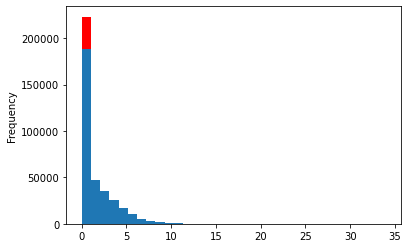

In [26]:
pd.DataFrame(tdf)[0].plot(kind="hist",bins=df.loc[:,("mort_acc")].nunique(),color="red")
df.loc[:,("mort_acc")].plot(kind="hist",bins=df.loc[:,("mort_acc")].nunique())

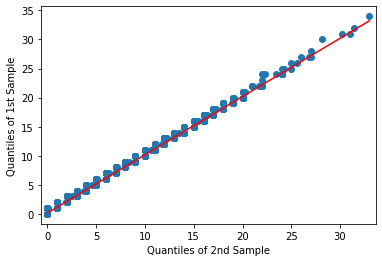

In [27]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(df.loc[:,("mort_acc")].dropna(inplace=False), pd.DataFrame(tdf)[0], line="r")
plt.show()

<mark><strong>distribution is very little affected after imputing null values</strong></mark>

### checking and removing duplicates

In [28]:
df.duplicated().sum()

0

# (D) Column Profiling / Feature engineering

In [29]:
# df.dtypes

#### integer columns

In [30]:
df.columns[df.dtypes=="float64"]

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [31]:
df.select_dtypes(include="float64").columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

#### object columns

In [32]:
df.columns[df.dtypes=="object"]

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [33]:
df.select_dtypes(include="object").columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

<strong>Data dictionary:</strong>

- <strong>loan_amnt :</strong> The listed `amount of the loan applied for by the borrower.` If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- <strong>term :</strong> The number of payments on the loan. Values are `in months` and can be `either 36 or 60.`

In [34]:
df[["loan_amnt","term"]].head()

,loan_amnt,term
0,10000.0,36 months
1,8000.0,36 months
2,15600.0,36 months
3,7200.0,36 months
4,24375.0,60 months


In [35]:
df["term"]=df["term"].str.extract("(\d+)")

In [36]:
df[["loan_amnt","term"]].head()

,loan_amnt,term
0,10000.0,36
1,8000.0,36
2,15600.0,36
3,7200.0,36
4,24375.0,60


In [37]:
df[["loan_amnt","term"]].dtypes

loan_amnt    float64
term          object
dtype: object

In [38]:
df["term"]=df["term"].astype("float64")

In [39]:
df[["loan_amnt","term"]].dtypes

loan_amnt    float64
term         float64
dtype: object

- <strong>int_rate :</strong> `Interest Rate` on the loan
- <strong>installment :</strong> The `monthly payment amount` owed by the borrower if the loan originates.
- <strong>grade :</strong> LoanTap assigned `loan grade`
- <strong>sub_grade :</strong> LoanTap assigned `loan subgrade`

In [40]:
df[["int_rate","installment"]].dtypes

int_rate       float64
installment    float64
dtype: object

In [41]:
df[["grade","sub_grade"]].head()

,grade,sub_grade
0,B,B4
1,B,B5
2,B,B3
3,A,A2
4,C,C5


In [42]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [43]:
df["grade"]=df["grade"].str.lower()

In [44]:
df["sub_grade"]=df["sub_grade"].str.extract("(\d+)")

In [45]:
df[["grade","sub_grade"]].head()

,grade,sub_grade
0,b,4
1,b,5
2,b,3
3,a,2
4,c,5


In [46]:
df["sub_grade"].unique()

array(['4', '5', '3', '2', '1'], dtype=object)

In [47]:
df[["grade","sub_grade"]].dtypes

grade        object
sub_grade    object
dtype: object

In [48]:
df["sub_grade"]=df["sub_grade"].astype("float64")

In [49]:
df[["grade","sub_grade"]].dtypes

grade         object
sub_grade    float64
dtype: object

- <strike><strong>emp_title :</strong>The job title supplied by the Borrower when applying for the loan.</strike>
- <strong>emp_length :</strong> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [50]:
df["emp_title"].nunique() #these many unique title will increase the dimensionality too much after one-hot-encoding

172144

In [51]:
#"emp_title" -> this column need to be dropped before train-test-split

In [52]:
df["emp_title"].value_counts()[:10]

Teacher             4367
Manager             4231
Registered Nurse    1841
RN                  1840
Supervisor          1812
Sales               1618
Project Manager     1494
Owner               1381
Driver              1318
Office Manager      1213
Name: emp_title, dtype: int64

<mark>top 2 profession of customers: <strong>Teacher and manager</strong></mark>

In [53]:
df["emp_title"]=df["emp_title"].str.lower()

In [54]:
df["emp_length"]=df["emp_length"].str.extract("(\d+)")

In [55]:
df["emp_length"]=df["emp_length"].astype("float64")

In [56]:
df[["emp_title","emp_length"]].head()

,emp_title,emp_length
0,marketing,10.0
1,credit analyst,4.0
2,statistician,1.0
3,client advocate,6.0
4,destiny management inc.,9.0


- <strong>home_ownership :</strong> The home ownership status provided by the borrower during registration or obtained from the credit report.
- <strong>annual_inc :</strong> The self-reported annual income provided by the borrower during registration.

In [57]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [58]:
df["home_ownership"]=df["home_ownership"].str.lower()

In [59]:
df[["home_ownership"]].head()

,home_ownership
0,rent
1,mortgage
2,rent
3,rent
4,mortgage


In [60]:
df[["annual_inc"]].head()

,annual_inc
0,117000.0
1,65000.0
2,43057.0
3,54000.0
4,55000.0


- <strong>verification_status :</strong> Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- <strike><strong>issue_d :</strong> The month which the loan was funded</strike>

In [61]:
df["verification_status"].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [62]:
df["verification_status"]=df["verification_status"].str.replace(" ","_")

In [63]:
df["verification_status"]=df["verification_status"].str.lower()

In [64]:
df[["verification_status"]].head()

,verification_status
0,not_verified
1,not_verified
2,source_verified
3,not_verified
4,verified


In [65]:
df[["issue_d"]].head()
#month in which loan was funded, clearly this column has no effect on target variable
#"issue_d" -> this column need to be dropped before train-test-split

,issue_d
0,Jan-2015
1,Jan-2015
2,Jan-2015
3,Nov-2014
4,Apr-2013


- <mark>loan_status :</mark> Current status of the loan - <mark>Target Variable</mark>
- purpose : A category provided by the borrower for the loan request.

In [66]:
df[["loan_status"]].head()
#target variable

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off


In [67]:
df[["loan_status"]].value_counts()/len(df)*100 #Imbalance Data

loan_status
Fully Paid     80.773403
Charged Off    19.226597
dtype: float64

In [68]:
df[["purpose"]].head()

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card


In [69]:
df["purpose"].nunique()

14

In [70]:
df["purpose"].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

- <strike><strong>title :</strong> The loan title provided by the borrower</strike>
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

In [71]:
df[["title"]].head()

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance


In [72]:
df[["title"]].value_counts()[:30]

title                    
Debt consolidation           144609
Credit card refinancing       48444
Home improvement              14209
Other                         12018
Debt Consolidation            11166
Major purchase                 4473
Consolidation                  3690
debt consolidation             3277
Debt Consolidation Loan        2750
Business                       2647
Medical expenses               2505
Car financing                  2015
Credit Card Consolidation      1693
Vacation                       1588
Moving and relocation          1574
Personal Loan                  1498
consolidation                  1480
Consolidation Loan             1259
Home Improvement               1171
Home buying                    1138
Credit Card Refinance          1057
Credit Card Payoff             1004
Consolidate                     873
Personal                        821
Loan                            730
Credit Card Loan                585
Freedom                         535
De

In [73]:
df[["title"]].value_counts()[-30:]

title                                    
Getting a house                              1
Getting Things Done                          1
Getting a lower interest                     1
Getting a new place                          1
Getting a relief                             1
Getting above water!                         1
Getting ahead finally                        1
Getting ahead in life!                       1
Getting ahead, one way or another            1
Getting Together                             1
Getting The Monkey Off My Back               1
Getting Rid of Bank of America               1
Getting Rid of High interest Credit cards    1
Getting Rid of College Debts                 1
Getting Rid of Credit Cards! - Lower APR     1
Getting Rid of Greentree                     1
Getting Rid of High APRs for Good            1
Getting Rid of High Interest Cards!          1
Getting Rid of High Interest Rates!!         1
Getting Rid of High Interests                1
Getting Rid of my 

In [74]:
df[["dti"]].head()

,dti
0,26.24
1,22.05
2,12.79
3,2.60
4,33.95


- <strike><strong>earliest_cr_line :</strong>The month the borrower's earliest reported credit line was opened</strike>
- <strong>open_acc :</strong> The number of open credit lines in the borrower's credit file.

In [75]:
df[["earliest_cr_line"]].head() #this column need to be dropped

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999


In [76]:
df[["open_acc"]].head()

,open_acc
0,16.0
1,17.0
2,13.0
3,6.0
4,13.0


- <strong>pub_rec :</strong> Number of derogatory public records
- <strong>revol_bal :</strong> Total credit revolving balance

In [77]:
df[["pub_rec"]].value_counts()

pub_rec
0.0        318267
1.0         45132
2.0          4956
3.0          1359
4.0           470
5.0           210
6.0           110
7.0            47
8.0            31
9.0            11
10.0           10
11.0            5
13.0            4
12.0            3
19.0            2
15.0            1
17.0            1
24.0            1
40.0            1
86.0            1
dtype: int64

In [78]:
df[["revol_bal"]].head()

,revol_bal
0,36369.0
1,20131.0
2,11987.0
3,5472.0
4,24584.0


- <strong>revol_util :</strong> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- <strong>total_acc :</strong> The total number of credit lines currently in the borrower's credit file

In [79]:
df[["revol_util"]].head()

,revol_util
0,41.8
1,53.3
2,92.2
3,21.5
4,69.8


In [80]:
df[["total_acc"]].head()

,total_acc
0,25.0
1,27.0
2,26.0
3,13.0
4,43.0


- <strong>initial_list_status :</strong> The initial listing status of the loan. Possible values are – W, F
- <strong>application_type :</strong> Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [81]:
df[["initial_list_status"]].value_counts(normalize=True)

initial_list_status
f                      0.599827
w                      0.400173
dtype: float64

In [82]:
df["application_type"]=df["application_type"].str.lower()

In [83]:
df[["application_type"]].value_counts()

application_type
individual          370066
joint                  311
direct_pay             245
dtype: int64

- <strong>mort_acc :</strong> Number of mortgage accounts.
- <strong>pub_rec_bankruptcies :</strong> Number of public record bankruptcies
- <strong>Address:</strong> Address of the individual

In [84]:
df[["mort_acc"]].nunique()

mort_acc    33
dtype: int64

In [85]:
df[["mort_acc"]].head()

,mort_acc
0,0.0
1,3.0
2,0.0
3,0.0
4,1.0


In [86]:
df[["mort_acc"]].tail()

,mort_acc
370617,0.0
370618,1.0
370619,0.0
370620,5.0
370621,NaN


In [87]:
df[["pub_rec_bankruptcies"]].value_counts()

pub_rec_bankruptcies
0.0                     329883
1.0                      38599
2.0                       1703
3.0                        325
4.0                         71
5.0                         30
6.0                          5
7.0                          4
8.0                          2
dtype: int64

In [88]:
df[["address"]].head()

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"


In [89]:
df["address"]=df["address"].str.extract("(\w{2}\s\d{5})")[0].str.extract("(^\w{2})")

In [90]:
df[["address"]].head()

,address
0,OK
1,SD
2,WV
3,MA
4,VA


In [91]:
df[["address"]].dtypes

address    object
dtype: object

In [92]:
df["address"].nunique()

54

In [93]:
df["address"].unique()

array(['OK', 'SD', 'WV', 'MA', 'VA', 'DE', 'TX', 'AE', 'AP', 'NM', 'MS',
       'OR', 'NH', 'HI', 'PA', 'CO', 'AL', 'FL', 'AZ', 'WI', 'NC', 'IN',
       'MO', 'AA', 'KS', 'CT', 'WY', 'NE', 'RI', 'AR', 'MI', 'LA', 'NY',
       'ND', 'IA', 'AK', 'UT', 'MD', 'IL', 'WA', 'MN', 'OH', 'MT', 'NJ',
       'TN', 'DC', 'NV', 'VT', 'CA', 'ME', 'ID', 'GA', 'KY', 'SC'],
      dtype=object)

### columns which need to be dropped

- <strike><strong>emp_title :</strong>The job title supplied by the Borrower when applying for the loan.</strike>
- <strike><strong>issue_d :</strong> The month which the loan was funded</strike>
- <strike><strong>title :</strong> The loan title provided by the borrower</strike>
- <strike><strong>earliest_cr_line :</strong>The month the borrower's earliest reported credit line was opened</strike>

In [94]:
df.drop(columns=["emp_title","issue_d","title","earliest_cr_line"], inplace=False)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36.0,11.44,329.48,b,4.0,10.0,rent,117000.0,not_verified,...,16.0,0.0,36369.0,41.8,25.0,w,individual,0.0,0.0,OK
1,8000.0,36.0,11.99,265.68,b,5.0,4.0,mortgage,65000.0,not_verified,...,17.0,0.0,20131.0,53.3,27.0,f,individual,3.0,0.0,SD
2,15600.0,36.0,10.49,506.97,b,3.0,1.0,rent,43057.0,source_verified,...,13.0,0.0,11987.0,92.2,26.0,f,individual,0.0,0.0,WV
3,7200.0,36.0,6.49,220.65,a,2.0,6.0,rent,54000.0,not_verified,...,6.0,0.0,5472.0,21.5,13.0,f,individual,0.0,0.0,MA
4,24375.0,60.0,17.27,609.33,c,5.0,9.0,mortgage,55000.0,verified,...,13.0,0.0,24584.0,69.8,43.0,f,individual,1.0,0.0,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370617,10000.0,60.0,10.99,217.38,b,4.0,2.0,rent,40000.0,source_verified,...,6.0,0.0,1990.0,34.3,23.0,w,individual,0.0,0.0,DC
370618,21000.0,36.0,12.29,700.42,c,1.0,5.0,mortgage,110000.0,source_verified,...,6.0,0.0,43263.0,95.7,8.0,f,individual,1.0,0.0,LA
370619,5000.0,36.0,9.99,161.32,b,1.0,10.0,rent,56500.0,verified,...,15.0,0.0,32704.0,66.9,23.0,f,individual,0.0,0.0,NY
370620,21000.0,60.0,15.31,503.02,c,2.0,10.0,mortgage,64000.0,verified,...,9.0,0.0,15704.0,53.8,20.0,f,individual,5.0,0.0,FL


In [95]:
df_bkp1 = df #backup till this point

In [96]:
df = df_bkp1.drop(columns=["emp_title","issue_d","title","earliest_cr_line"], inplace=False)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370622 entries, 0 to 370621
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             370622 non-null  float64
 1   term                  370622 non-null  float64
 2   int_rate              370622 non-null  float64
 3   installment           370622 non-null  float64
 4   grade                 370622 non-null  object 
 5   sub_grade             370622 non-null  float64
 6   emp_length            370622 non-null  float64
 7   home_ownership        370622 non-null  object 
 8   annual_inc            370622 non-null  float64
 9   verification_status   370622 non-null  object 
 10  loan_status           370622 non-null  object 
 11  purpose               370622 non-null  object 
 12  dti                   370622 non-null  float64
 13  open_acc              370622 non-null  float64
 14  pub_rec               370622 non-null  float64
 15  

# (E) Features Analysis

In [98]:
df.columns[df.dtypes=="float64"]

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,370622.0,14250.170322,8357.778271,500.00,8000.00,12000.00,20000.00,40000.00
term,370622.0,41.836912,10.296438,36.00,36.00,36.00,36.00,60.00
int_rate,370622.0,13.637453,4.471630,5.32,10.49,13.33,16.49,30.99
installment,370622.0,435.217906,250.358669,16.08,254.17,379.19,571.56,1533.81
sub_grade,370622.0,2.972587,1.406755,1.00,2.00,3.00,4.00,5.00
emp_length,370622.0,6.018545,3.516745,1.00,3.00,6.00,10.00,10.00
annual_inc,370622.0,75187.979404,62090.207381,4000.00,46000.00,65000.00,90000.00,8706582.00
dti,370622.0,17.337353,8.103810,0.00,11.32,16.90,22.93,380.53
open_acc,370622.0,11.393325,5.146307,1.00,8.00,11.00,14.00,90.00
pub_rec,370622.0,0.172278,0.523620,0.00,0.00,0.00,0.00,86.00


In [100]:
pd.DataFrame(df.describe().T["mean"]-df.describe().T["50%"], columns=["mean-median"])
#checking difference between mean and median

,mean-median
loan_amnt,2250.170322
term,5.836912
int_rate,0.307453
installment,56.027906
sub_grade,-0.027413
emp_length,0.018545
annual_inc,10187.979404
dti,0.437353
open_acc,0.393325
pub_rec,0.172278


<AxesSubplot:xlabel='loan_amnt'>

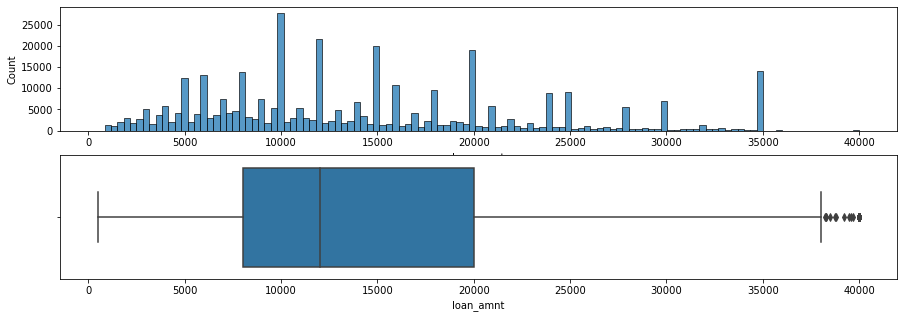

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=df, x="loan_amnt")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="loan_amnt")

<mark>loan data is not normally distributed</mark>

In [102]:
df[["annual_inc","revol_bal"]].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,370622.0,75187.979404,62090.207381,4000.0,46000.0,65000.0,90000.0,8706582.0
revol_bal,370622.0,15950.665039,20538.921831,0.0,6115.0,11303.0,19767.0,1743266.0


## bivariate analysis

In [103]:
DF = df.dropna()

In [104]:
DF.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [105]:
Data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

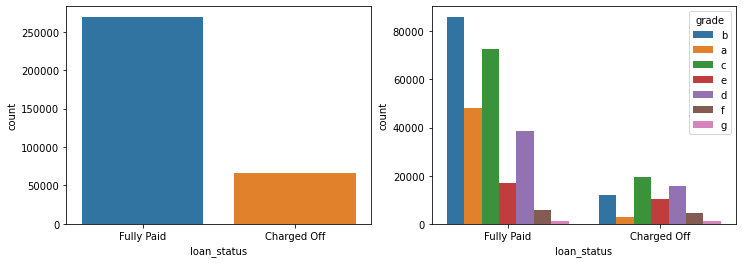

In [106]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=DF, x="loan_status")
plt.subplot(1,2,2)
sns.countplot(data=DF, x="loan_status", hue="grade")

In [107]:
df[["loan_status"]].value_counts(normalize=True) #highly imbalance data

loan_status
Fully Paid     0.807734
Charged Off    0.192266
dtype: float64

<mark>approximately 80% individuals fully paid back the loan</mark>

<mark>People with grades ‘B’ are more likely to fully pay their loan.</mark>

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

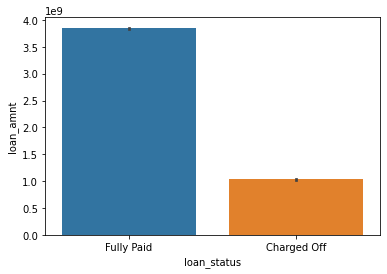

In [108]:
sns.barplot(data=DF, x="loan_status", y="loan_amnt", estimator=np.sum)

In [109]:
df[["loan_status","loan_amnt"]].groupby(["loan_status"]).aggregate("sum")/df["loan_amnt"].sum()

,loan_amnt
loan_status,
Charged Off,0.207579
Fully Paid,0.792421


<mark>approx 79% of total loan amount is fully paid back</mark>

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

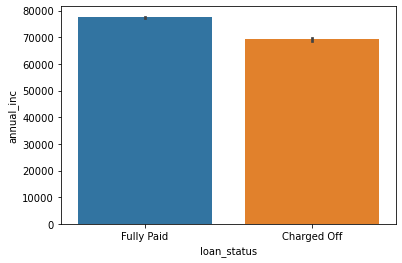

In [110]:
sns.barplot(data=DF, x="loan_status", y="annual_inc", estimator=np.mean)

<mark>customers in fully paid category haave slightly high mean income</mark>

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

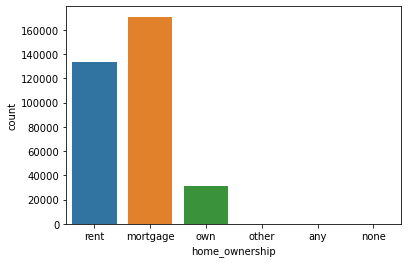

In [111]:
sns.countplot(data=DF, x="home_ownership")

<mark>The majority of people have home ownership as <strong>mortgage</strong></mark>

<AxesSubplot:xlabel='address', ylabel='count'>

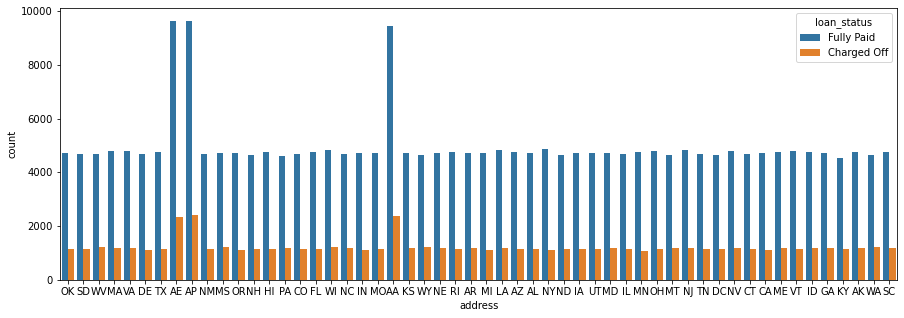

In [112]:
plt.figure(figsize=(15,5))
sns.countplot(data=DF, x="address", hue="loan_status")

<mark>customers from AE, AP, AA are more compared to other regions</mark>

# (F) Checking outliers

### <mark>creating a function to remove outliers from a given array (using IQR method)</mark>

In [113]:
def remove_outliers(arr):
    IQR = np.quantile(arr, 0.75)-np.quantile(arr, 0.25)
    LL = np.quantile(arr, 0.25)-1.5*IQR
    UL = np.quantile(arr, 0.75)+1.5*IQR
    arr = arr[arr>LL]
    arr = arr[arr<UL]
    return (arr)

### outliers% in columns

In [114]:
arr_temp = []
for col in df.columns[df.dtypes=="float64"]:
    if df[col].nunique()>100:
        arr_temp.append(col)
arr_temp

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util',
 'total_acc']

In [115]:
for col in arr_temp:
    arr = df[col].values; N=len(arr)
    percnt = (N-len(remove_outliers(arr)))/N*100
    print(col,":  ",round(percnt,2),"%")

loan_amnt :   0.05 %
int_rate :   0.95 %
installment :   2.77 %
annual_inc :   4.38 %
dti :   0.06 %
revol_bal :   5.34 %
revol_util :   0.0 %
total_acc :   2.17 %


# (G) Checking Multicolliniarity

<strong>Basic assumptions</strong> that must be met for `logistic regression` include <strong>independence of errors, linearity in the logit for continuous variables, absence of multicollinearity, and lack of strongly influential outliers.</strong>

In [116]:
corr_val=df[df.columns[df.dtypes=="float64"]].corr()

In [117]:
corr_val.shape

(15, 15)

In [118]:
((abs(corr_val)>=0.4).sum().sum()-corr_val.shape[0])/2 #total highly correlated pairs

4.0

In [119]:
(corr_val<=(-0.5)).sum().sum() #highly negative correlated pairs

0

In [120]:
((corr_val>=0.4).sum().sum()-corr_val.shape[0])/2 #highly positive correlated pairs

4.0

<AxesSubplot:>

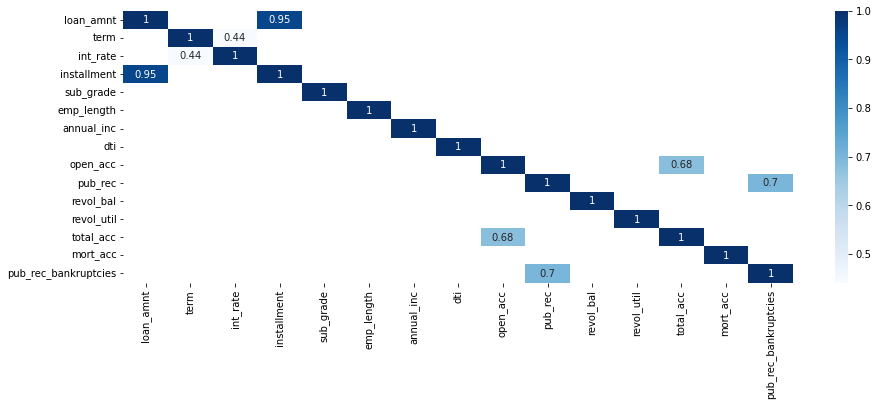

In [121]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_val[corr_val>=0.4], annot=True, cmap="Blues")

<mark>correlation between Loan Amount and Installment features is 0.95 which is very high correlation.</mark>

In [122]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
vif = pd.DataFrame()
X_t = df.loc[:,df.columns[df.dtypes=="float64"]].dropna() #mandatory to drop nulls
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loan_amnt,125.88
3,installment,112.59
1,term,48.52
2,int_rate,20.69
12,total_acc,13.18
8,open_acc,12.65
11,revol_util,7.49
7,dti,7.29
4,sub_grade,5.22
5,emp_length,4.13


In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
# importing libraries
import statsmodels.api as sm
import pandas as pd 
  
# loading the training dataset 
df_sm = df.loc[:,list(df.columns[df.dtypes=="float64"])+["loan_status"]].dropna() #mandatory to drop nulls
  
# defining the dependent and independent variables
Xtrain = df_sm.drop(columns=["loan_status"])
ytrain = LabelEncoder().fit_transform(df_sm["loan_status"])
   
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.474174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               335868
Model:                          Logit   Df Residuals:                   335853
Method:                           MLE   Df Model:                           14
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04559
Time:                        12:57:39   Log-Likelihood:            -1.5926e+05
converged:                       True   LL-Null:                   -1.6687e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
loan_amnt               -0.0003   2.85e-06   -109.001      0.000      -0.000      -0.000

<mark><strong>both VIF>5 and pvalue>0.05 </strong></mark>`not found for any numerical column`

# (H) Column transformation and model building

In [126]:
df[df.columns[df.dtypes=="object"]].head()

,grade,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,address
0,b,rent,not_verified,Fully Paid,vacation,w,individual,OK
1,b,mortgage,not_verified,Fully Paid,debt_consolidation,f,individual,SD
2,b,rent,source_verified,Fully Paid,credit_card,f,individual,WV
3,a,rent,not_verified,Fully Paid,credit_card,f,individual,MA
4,c,mortgage,verified,Charged Off,credit_card,f,individual,VA


- `One-hot/dummy encoding:` <strong>home_ownership, purpose, application_type, address, verification_status</strong>
- `Ordinal encoding:` <strong>grade, initial_list_status</strong>
- <mark>Target/Label encoding:</mark> <strong>loan_status</strong>

In [127]:
df.shape

(370622, 23)

In [128]:
sorted(df["grade"].unique())

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [129]:
sorted(df["initial_list_status"].unique())

['f', 'w']

In [130]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [131]:
from sklearn.impute import SimpleImputer

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [133]:
X=df.drop(columns=["loan_status"],inplace=False)

In [134]:
y=df["loan_status"].values

### train_test_split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

### label encoding

In [158]:
le = LabelEncoder()

In [159]:
le.fit(y_train)

LabelEncoder()

In [160]:
y_train=le.transform(y_train)

In [161]:
y_test=le.transform(y_test)

### ColumnTransformers and pipeline

In [162]:
from sklearn.compose import ColumnTransformer

In [163]:
# transformer = ColumnTransformer(transformers=[], remainder= )

In [164]:
transformer = ColumnTransformer(transformers=[
("step1",SimpleImputer(strategy="most_frequent"),["mort_acc"]),
("step2",OrdinalEncoder(categories=[sorted(df["grade"].unique()),sorted(df["initial_list_status"].unique())]),["grade","initial_list_status"]),
("step3",OneHotEncoder(drop="first",sparse=False,handle_unknown="ignore"),["home_ownership", "purpose", "application_type", "address", "verification_status"])
], remainder="passthrough" )

### pipeline

In [165]:
from sklearn.pipeline import Pipeline, make_pipeline

In [166]:
# imputer transformer
trf1 = ColumnTransformer([("impute_mort",SimpleImputer(strategy="most_frequent"),[19])],
                          remainder="passthrough")

In [167]:
# ordinal encoder transformer
trf2 = ColumnTransformer(["encode_grade_ils",OrdinalEncoder(categories=[['a', 'b', 'c', 'd', 'e', 'f', 'g'],['f', 'w']]),[4,17]],
                          remainder="passthrough")

In [168]:
# one hot encoder transformer
trf3 = ColumnTransformer(["ohe_7/9/10/18/21",OneHotEncoder(drop="first",sparse=False,handle_unknown="ignore"),[7,9,10,18,21]],
                         remainder="passthrough")

In [169]:
# scaling
trf4 = ColumnTransformer([("scale",StandardScaler(),slice(0,92))],
                         remainder="passthrough")

In [170]:
# logisticRegression model
from sklearn.linear_model import LogisticRegression
trf5 = LogisticRegression(max_iter=500)

In [171]:
pipe = Pipeline([("trf1",trf1),("trf2",trf2),("trf3",trf3),("trf4",trf4),("trf5",trf5)])

In [172]:
# pipe.fit(X_train, y_train)

In [173]:
pipe2 = Pipeline([("transformer",transformer),("trf4",trf4),("trf5",trf5)])

### model training

In [174]:
# display pipeline
from sklearn import set_config
set_config(display="diagram")

In [175]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['mort_acc']),
                                                 ('step2',
                                                  OrdinalEncoder(categories=[['a',
                                                                              'b',
                                                                              'c',
                                                                              'd',
                                                                              'e',
                                                                              'f',
                                                                              'g'],
                                                                             ['f',
                                                                              'w']]),
                                                  ['grade',
                                                   'initial_list_status']),
                                                 ('step3',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['home_ownership', 'purpose',
                                                   'application_type',
                                                   'address',
                                                   'verification_status'])])),
                ('trf4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 92, None))])),
                ('trf5', LogisticRegression(max_iter=500))])

### Exploring the pipeline

In [180]:
pipe2.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('step1',
                                  SimpleImputer(strategy='most_frequent'),
                                  ['mort_acc']),
                                 ('step2',
                                  OrdinalEncoder(categories=[['a', 'b', 'c', 'd',
                                                              'e', 'f', 'g'],
                                                             ['f', 'w']]),
                                  ['grade', 'initial_list_status']),
                                 ('step3',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  ['home_ownership', 'purpose',
                                   'application_type', 'address',
                                   'verification_status'

In [181]:
pipe2.named_steps["transformer"]

ColumnTransformer(remainder='passthrough',
                  transformers=[('step1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['mort_acc']),
                                ('step2',
                                 OrdinalEncoder(categories=[['a', 'b', 'c', 'd',
                                                             'e', 'f', 'g'],
                                                            ['f', 'w']]),
                                 ['grade', 'initial_list_status']),
                                ('step3',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['home_ownership', 'purpose',
                                  'application_type', 'address',
                                  'verification_status'])])

In [182]:
pipe2.named_steps["transformer"].transformers_[0][1].statistics_ #we get the highest frequency data imputed by imputer


array([0.])

In [183]:
pipe2.named_steps["trf4"]

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 slice(0, 92, None))])

### prediction

In [176]:
# predict
y_pred = pipe2.predict(X_test)

In [177]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [178]:
le.inverse_transform(y_pred)

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [179]:
le.inverse_transform([0,1])

array(['Charged Off', 'Fully Paid'], dtype=object)

### predicting by probability

In [211]:
pipe2.predict_proba(X_test)

array([[0.2616624 , 0.7383376 ],
       [0.1232854 , 0.8767146 ],
       [0.09777997, 0.90222003],
       ...,
       [0.3752574 , 0.6247426 ],
       [0.10413369, 0.89586631],
       [0.35414901, 0.64585099]])

In [213]:
pipe2.predict_proba(X_test)[:,1]

array([0.7383376 , 0.8767146 , 0.90222003, ..., 0.6247426 , 0.89586631,
       0.64585099])

### `probability threshold regularisation` using `precision-recall curve`

In [219]:
thresh_prob = np.vectorize(lambda x,thresh=0.5: 1 if x>=thresh else 0)

In [223]:
thresh_prob(pipe2.predict_proba(X_test)[:,1],thresh=0.5)

array([1, 1, 1, ..., 1, 1, 1])

In [227]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [254]:
threshold = np.arange(0.1,0.9,0.1)

In [255]:
y_pred_prob = pipe2.predict_proba(X_test)[:,1]
f1 = []; pr=[]; re=[]
for prob in threshold:
    y_hat = thresh_prob(y_pred_prob, thresh = prob)
    sc_pr = precision_score(y_test, y_hat)
    pr.append(sc_pr)
    sc_re = recall_score(y_test, y_hat)
    re.append(sc_re)
    sc_f1 = f1_score(y_test, y_hat)
    f1.append(sc_f1)

Text(0.5, 1.0, 'Precision-Recall-Curve')

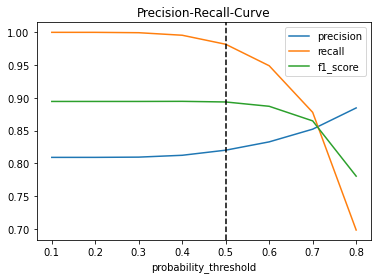

In [269]:
plt.plot(threshold, pr, label="precision")
plt.plot(threshold, re, label="recall")
plt.plot(threshold, f1, label="f1_score")
plt.xlabel("probability_threshold")
plt.axvline(0.5,c="k",linestyle="--")
plt.legend()
plt.title("Precision-Recall-Curve")

<mark><strong>since in this case-study we are ok with high recall(i.e, approx 0.98) and less precision(i.e, approx 0.82),</strong></mark><br>
<mark><strong>default probability_threshold=0.5 is good to go</strong></mark>

# (I) Checking all metrics

In [270]:
### coefficients and intercepts

In [209]:
# pipe2.coef_

In [210]:
# pipe2.intercept_

### checking accuracy metric

In [184]:
from sklearn.metrics import accuracy_score

In [185]:
accuracy_score(y_test, y_pred)

0.8111298482293423

In [186]:
pipe2.score(X_test,y_test)

0.8111298482293423

### confusion matrix

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [188]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [189]:
conf_matrix

array([[ 1232, 12907],
       [ 1093, 58893]], dtype=int64)

In [190]:
pd.DataFrame(conf_matrix, columns=le.inverse_transform([0,1]))

,Charged Off,Fully Paid
0,1232,12907
1,1093,58893


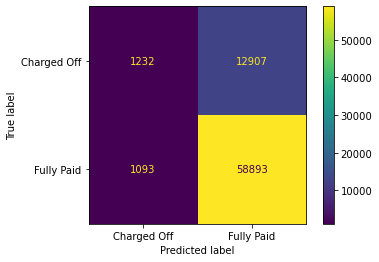

In [191]:
ConfusionMatrixDisplay(conf_matrix, display_labels=le.inverse_transform([0,1])).plot()

In [192]:
le.inverse_transform([0,1])

array(['Charged Off', 'Fully Paid'], dtype=object)

In [193]:
pd.DataFrame(conf_matrix, columns=le.inverse_transform([0,1]))

,Charged Off,Fully Paid
0,1232,12907
1,1093,58893


In [194]:
TN = conf_matrix[0,0];TP = conf_matrix[1,1];FP = conf_matrix[0,1];FN = conf_matrix[1,0]

In [195]:
print("TN =",TN,"  ","TP =",TP,"  ","FP =",FP,"  ","FN =",FN)

TN = 1232    TP = 58893    FP = 12907    FN = 1093


In [196]:
TP/(TP+FP) #precision

0.8202367688022284

In [197]:
TP/(TP+FN) #recall

0.98177908178575

### precision, recall and f1_score of test data

In [198]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [199]:
print("precision_score:",precision_score(y_test, y_pred))

precision_score: 0.8202367688022284


In [200]:
print("recall_score:",recall_score(y_test, y_pred))

recall_score: 0.98177908178575


In [201]:
print("f1_score:",f1_score(y_test, y_pred))

f1_score: 0.8937671679844598


### checking overfiiting/underfitting by analysing all metrics for train data

In [225]:
print("precision_score:",precision_score(y_train, pipe2.predict(X_train))) #precision score of train data

precision_score: 0.8176638176638177


In [226]:
print("recall_score:",recall_score(y_train, pipe2.predict(X_train))) #recall score of train data

recall_score: 0.9819323413179156


In [224]:
print("f1_score:",f1_score(y_train, pipe2.predict(X_train))) #recall score of train data

f1_score: 0.8923008008017508


<mark><strong>all score of test data is approximately equal to train score, hence no underfittig or overfitting</strong></mark><strong>

### classification report

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.09      0.15     14139
           1       0.82      0.98      0.89     59986

    accuracy                           0.81     74125
   macro avg       0.68      0.53      0.52     74125
weighted avg       0.76      0.81      0.75     74125



### ROC-AUC

In [203]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [257]:
fpr, tpr, thr = roc_curve(y_test, pipe2.predict_proba(X_test)[:,1])

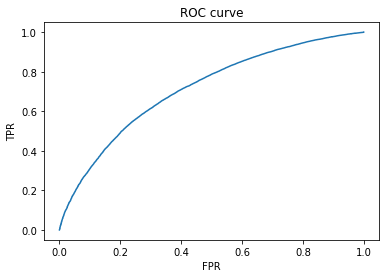

In [258]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [259]:
roc_auc_score(y_test, pipe2.predict_proba(X_test)[:,1])

0.713594276036217

# (J) observations

Q1: What percentage of customers have fully paid their Loan Amount?<br>
Ans: 80.77%<br>
<br>
Q2: Comment about the correlation between Loan Amount and Installment features.<br>
Ans: correlation between Loan Amount and Installment features is 0.95 which is very high correlation.<br>
<br>
Q3: The majority of people have home ownership as _______.<br>
Ans: mortgage<br>
<br>
Q4: People with grades ‘A’ are more likely to fully pay their loan. (T/F)<br>
Ans: False <br>
<br>
Q5: Name the top 2 afforded job titles.<br>
Ans: Teacher and manager<br>
<br>
Q6: Thinking from a bank's perspective, which metric should our primary focus be on..<br>
        - ROC AUC<br>
        - Precision<br>
        - Recall<br>
        - F1 Score<br>
Ans: Since defaulters are very less and interest rate is high, the model should be such that it correctly classify 
     the "Fully paid" customers as much correctly possible.<br>
     Hence Recall should be high.<br>
<br>
Q7: How does the gap in precision and recall affect the bank?<br>
Ans: when Recall is high then chances of rejecting  good customer is very less.<br>
     when Precision is high then chances of giving loan to bad customers is very less.<br>
<br>
Q8: Which were the features that heavily affected the outcome?<br>
Ans: pub_rec_bankruptcies<br>
<br>
Q9: Will the results be affected by geographical location? (Yes/No)<br>
Ans: yes<br>

# (K) Recommendations

when Recall is high then chances of rejecting  good customer is very less.<br>
when Precision is high then chances of giving loan to bad customers is very less.

# --------------------------------------------------X-------------------------------------------------------- #

# from-peers-review

**Recommendation:**

- Since increase in loan amount reduces the probability of loan repayment, it is better to look into supporting metrics(for example: credit score, cisf score etc.) before rolling out loans to potential customers.
- At the same time increase in interest rate reduces the probability of loan repayment. So, either LoanTap should increase the loan cycle/period before rolling out loans to potential customers or offer loans at relatively less interest rate for short period.
- We, also see that increase in installment period increases the probability of loan repayment. So, LoanTap should provide less loan amount in terms of volume to customers with high risk profile for long duration. As that might increase their ability to repay the loan on time.
- As Grade, positively impacts the probability of loan repayment and we have also seen that people with high grades have high percentage of loan repayment status. So, majority of loans should be disbured to individuals with high grades to reduce the risk of repayment cycles.
- LoanTap can also partner with MNC's by offering loans to customers during pandemic or emergency at affordable interest rates as health insurance/hospitalization cover is vitag cog to most employees working in MNC's.
- LoanTap can offer meal cards for small loan amounts in multiples of 100s or 1000s which could used by customers at famous food outlets and restaurant chains. This reduces the risk of loan repayment as the loan amount is relatively lesser in volume.